# Explore here

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
local_csv_raw = "medical_insurance_cost.csv"
df = pd.read_csv(local_csv_raw)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
print("Data Frame Info")
df.info()

Data Frame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
print("Data Frame null values")
print(df.isnull().sum().sort_values(ascending=False))

Data Frame null values
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [26]:
print("Data Frame duplicate rows")
print(df.duplicated().sum())
df

Data Frame duplicate rows
1


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
df.drop_duplicates(inplace=True)
print(f"Duplicated rows: {df.duplicated().sum()}")
df.head()


Duplicated rows: 0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
print("Data Frame shape")
print(df.shape)

Data Frame shape
(1337, 7)


In [29]:
print("Data Frame Description")
df.describe()

Data Frame Description


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
print("Data Frame Descriptive Statistics")
for column in df.columns:
    print(f"{column}:")
    print(df[column].describe())

Data Frame Descriptive Statistics
age:
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
sex:
count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object
bmi:
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
children:
count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
smoker:
count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object
region:
count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object
charges:
count     1337.000000
mean     13279.121487
std 

Categorical variables:


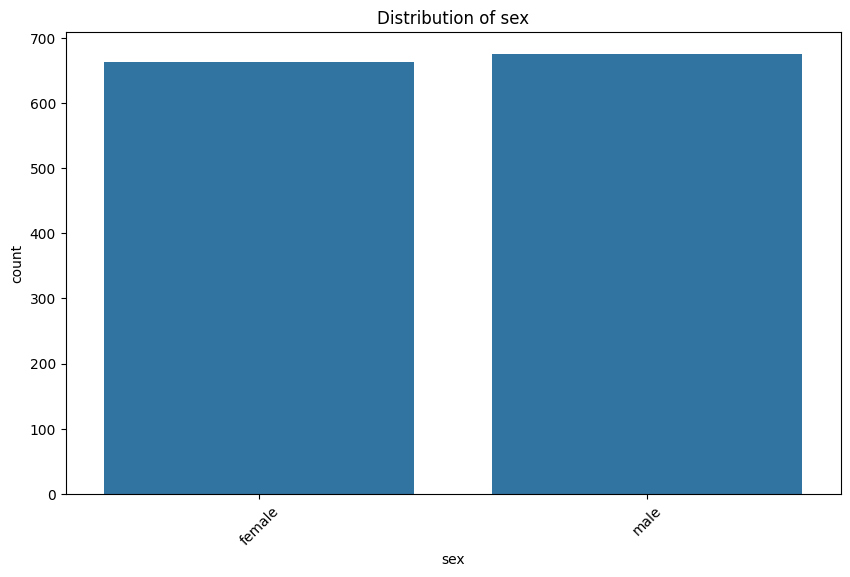

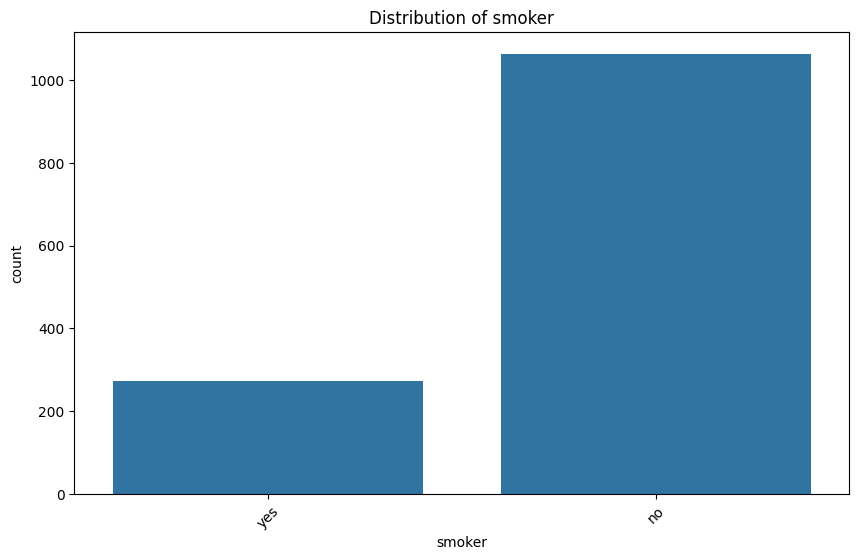

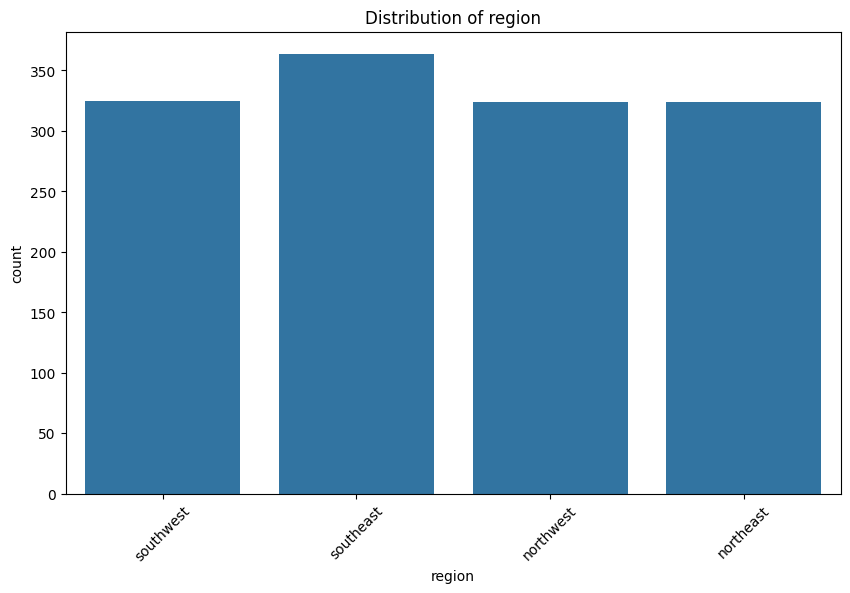

In [31]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical variables:")
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

Numerical variables:


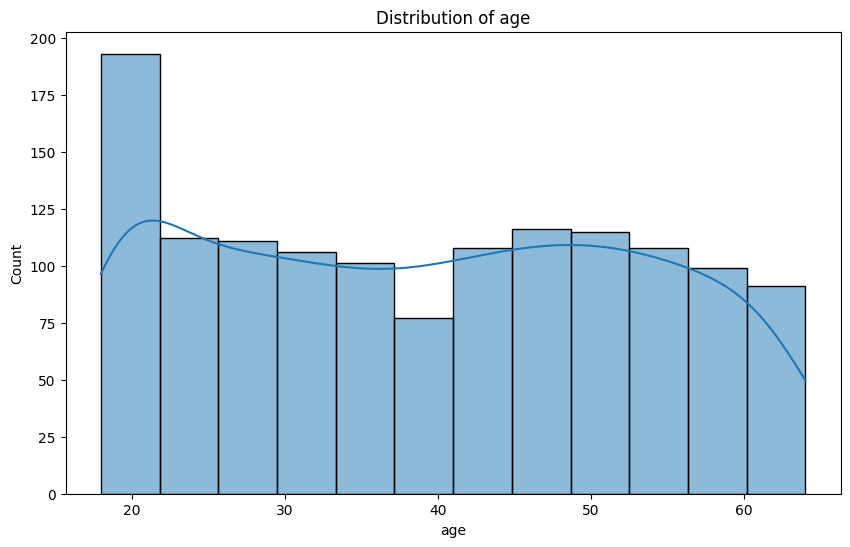

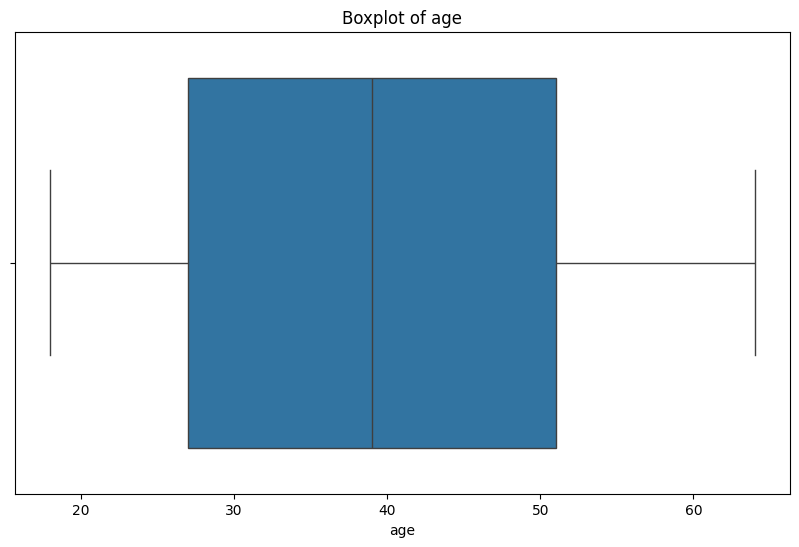

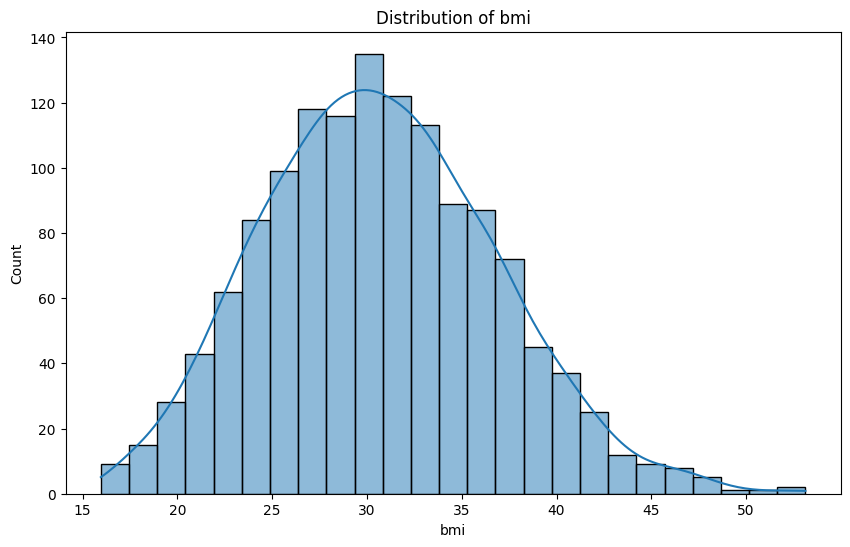

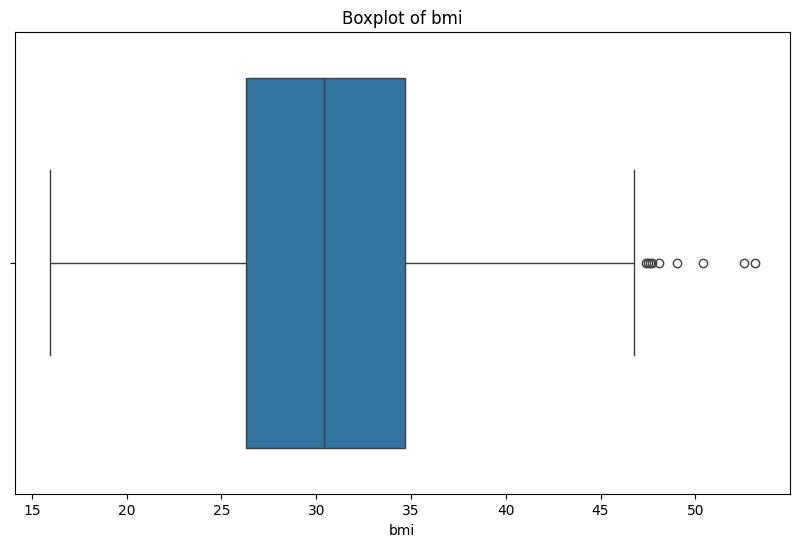

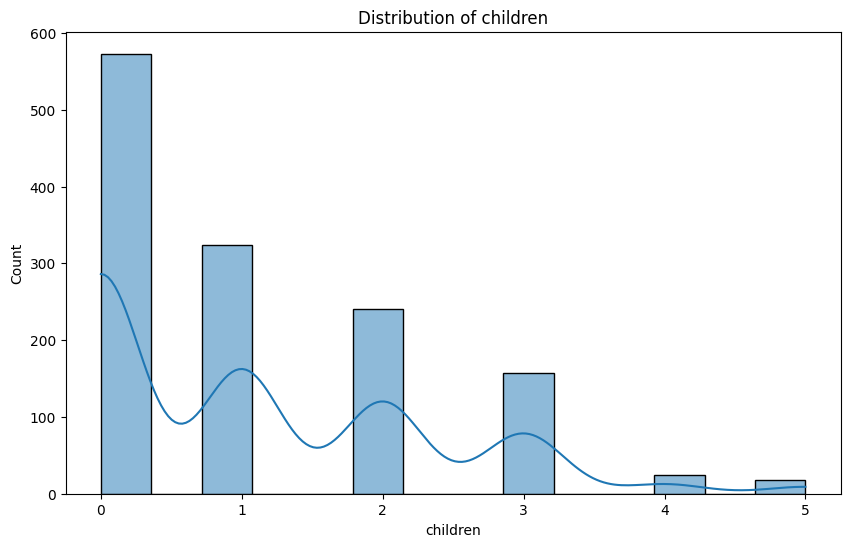

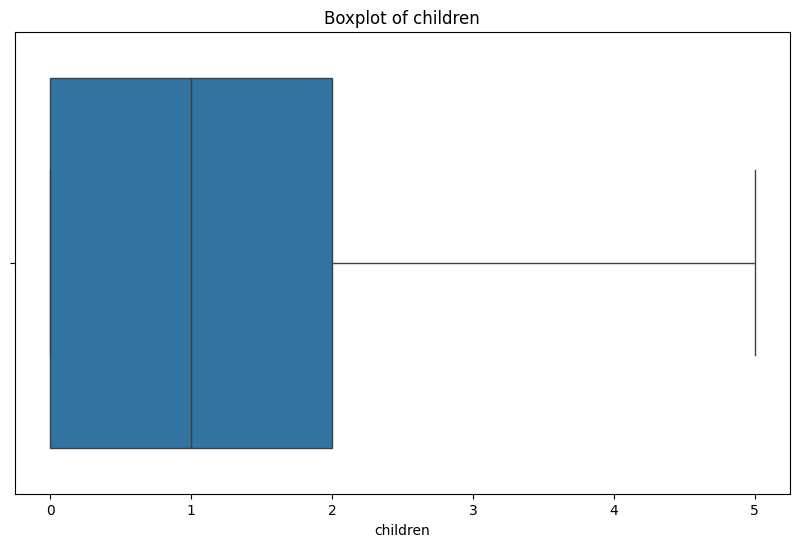

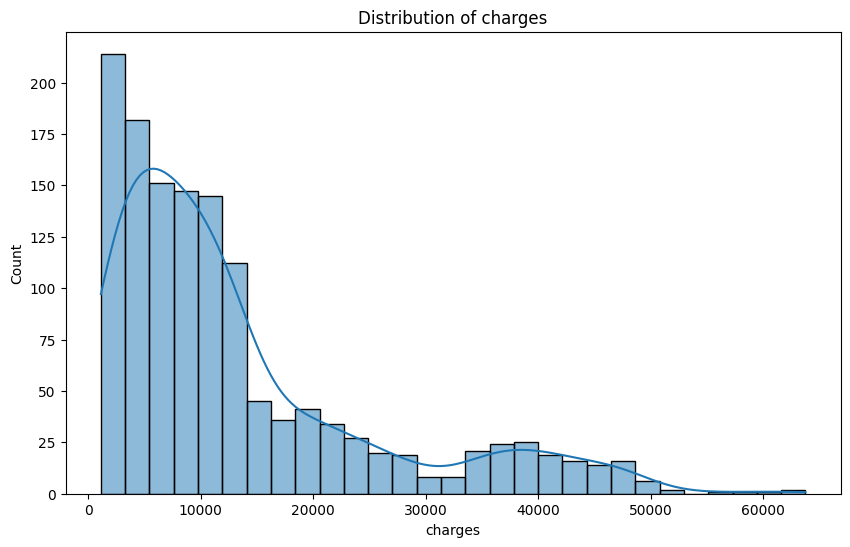

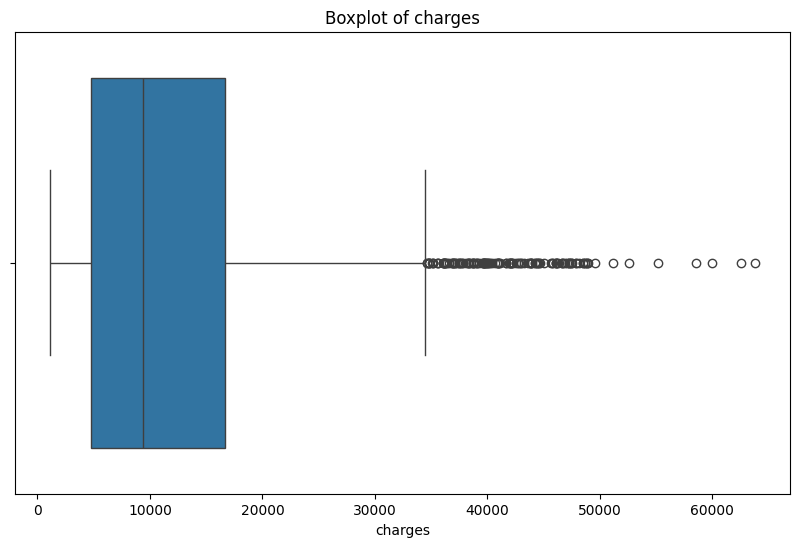

In [32]:
print("Numerical variables:")
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")
    plt.show()

Correlation matrix:


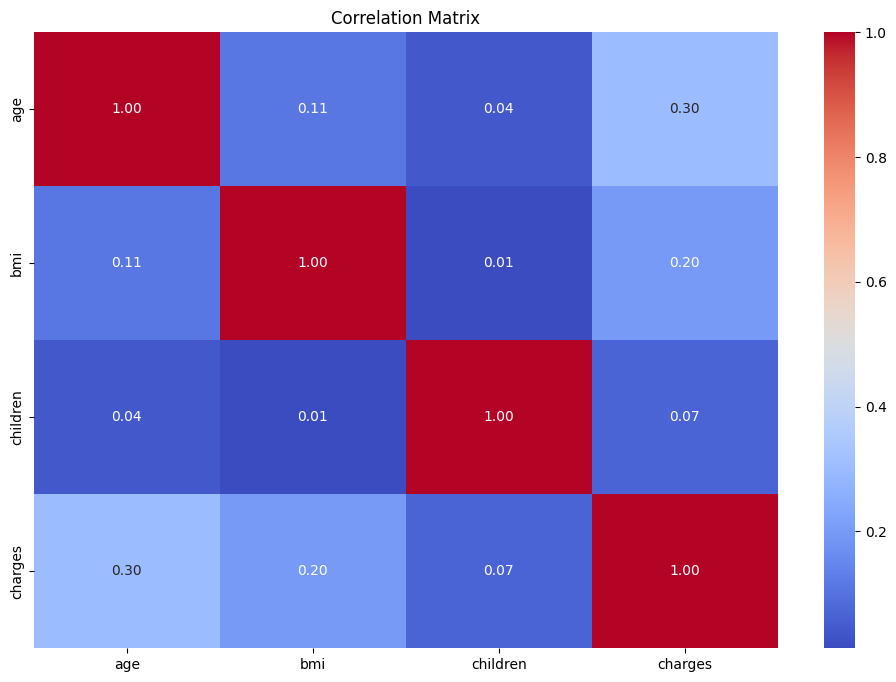

In [33]:
print("Correlation matrix:")
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
